# ue2, Jack Heseltine
## 2.2

4  valid solutions
[7, 1, 5, 2, 3, 4, 8]
[7, 1, 2, 3, 4, 5, 8]
[7, 1, 2, 3, 5, 4, 8]
[7, 1, 2, 5, 3, 4, 8]


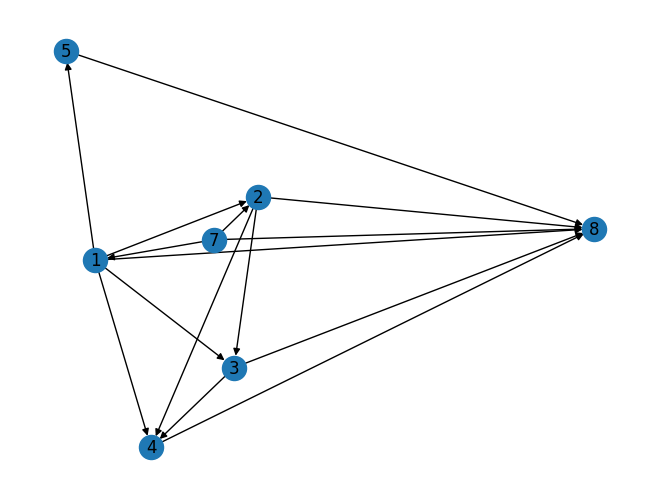

In [45]:
import networkx as nx

# DiGraph: arrow head points to right element in tuple (L, R), if it matters
DG = nx.DiGraph([(1,2),(1,3),(1,4),(1,5),(1,8),(2,3),(2,4),(2,8),(3,4),(3,8),(4,8),(5,8),(7,1),(7,2),(7,8)]) # arrow directions not correct yet
nx.draw(DG, with_labels=True)

TS = list(nx.all_topological_sorts(DG))
print(len(TS), " valid solutions")
for t in TS:
    print(t) # gives the topological sort options of the nodes